In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt

In [2]:
crimeAw= p.read_csv(r"C:\CrimeAgainstWoman\archive\CrimesOnWomenData.csv")
crimeAw.drop(['Unnamed: 0'], axis=1, inplace=True)
crimeAw

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [3]:
crimeAw.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
crimeAw.tail()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0
735,Puducherry,2021,2,0,2,31,3,12,0


In [5]:
crimeD = crimeAw.drop('Year',axis=1).describe().transpose()
crimeD

,count,mean,std,min,25%,50%,75%,max
Rape,736.0,727.855978,977.024945,0.0,35.00,348.5,1069.00,6337.0
K&A,736.0,1134.542120,1993.536828,0.0,24.75,290.0,1216.00,15381.0
DD,736.0,215.692935,424.927334,0.0,1.00,29.0,259.00,2524.0
AoW,736.0,1579.115489,2463.962518,0.0,34.00,387.5,2122.25,14853.0
AoM,736.0,332.722826,806.024551,0.0,3.00,31.0,277.50,9422.0
DV,736.0,2595.078804,4042.004953,0.0,13.00,678.5,3545.00,23278.0
WT,736.0,28.744565,79.999660,0.0,0.00,0.0,15.00,549.0


In [6]:
crimeAw.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

In [7]:
crimeAw.duplicated().sum()

0

In [8]:
crimeAw.dtypes

State    object
Year      int64
Rape      int64
K&A       int64
DD        int64
AoW       int64
AoM       int64
DV        int64
WT        int64
dtype: object

In [9]:
crimeAw.loc[(crimeAw.Year==2013) & (crimeAw.State=='Arunachal Pradesh')]

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
413,Arunachal Pradesh,2013,75,86,0,93,3,29,2


In [10]:
crime_distribution = crimeAw.drop(['State', 'Year'], axis=1).sum()
crime_distribution

Rape     535702
K&A      835023
DD       158750
AoW     1162229
AoM      244884
DV      1909978
WT        21156
dtype: int64

In [11]:
correlation_matrix = crimeAw.drop(['State', 'Year'], axis=1).corr()
correlation_matrix

,Rape,K&A,DD,AoW,AoM,DV,WT
Rape,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
K&A,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
DD,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
AoW,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
AoM,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
DV,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
WT,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


<Axes: xlabel='State'>

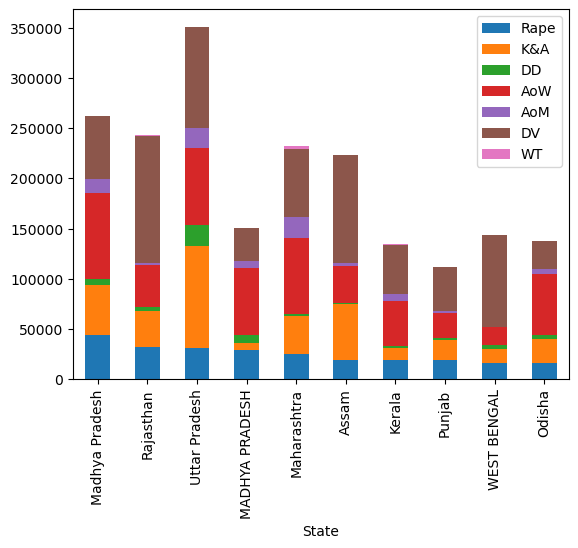

In [12]:
crimes= crimeAw.drop('Year',axis =1)
crimes.groupby('State').sum().sort_values('Rape',ascending=False).head(10).plot(kind='bar',stacked=True)


In [13]:
crimeAw.pivot_table(columns='Year',index="State",values='Rape',aggfunc='max')

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,3.0,2.0,2.0,10.0,4.0,6.0,3.0,12.0,18.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A & N Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,27.0,32.0,36.0,30.0,13.0,30.0,13.0,60.0,74.0
ANDHRA PRADESH,871.0,1002.0,946.0,1016.0,935.0,1049.0,1070.0,1257.0,1188.0,1362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARUNACHAL PRADESH,33.0,38.0,31.0,42.0,35.0,37.0,48.0,42.0,59.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSAM,817.0,970.0,1095.0,1171.0,1238.0,1244.0,1437.0,1438.0,1631.0,1721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTTARAKHAND,74.0,89.0,107.0,115.0,133.0,147.0,117.0,87.0,111.0,121.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1963.0,3050.0,3467.0,3025.0,4816.0,4246.0,3946.0,3065.0,487.0,534.0
Uttarakhand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,148.0,228.0,270.0,283.0,336.0,374.0,561.0,526.0,1128.0,1123.0
